In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

In [ ]:
CSV_PATH = "titanic.csv"

In [ ]:
df = pd.read_csv(CSV_PATH)

In [ ]:
print("Colunas originais:", list(df.columns))
print("Número de linhas:", len(df))

Colunas originais: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Número de linhas: 891


In [ ]:
#converter colunas categóricas (temporariamente) para códigos numéricos
df_var = df.copy()

In [ ]:
# converter objetos/categorias para códigos inteiros (mantendo NaNs como NaN)
for col in df_var.columns:
    if df_var[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_var[col]):
        df_var[col] = df_var[col].astype('category').cat.codes.replace(-1, np.nan)

/tmp/ipython-input-2593147455.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_var[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_var[col]):
/tmp/ipython-input-2593147455.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_var[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_var[col]):
/tmp/ipython-input-2593147455.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_var[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_var[col]):


In [ ]:
# preencher NaNs com média (apenas para cálculo de variância; outra escolha é 0)
df_var = df_var.fillna(df_var.mean())

selector = VarianceThreshold(threshold=0.01)
selector.fit(df_var)

cols = df_var.columns
mask = selector.get_support()
kept_by_variance = list(cols[mask])
removed_by_variance = list(cols[~mask])

print("\n--- Filtro por Variância (threshold=0.01) ---")
print("Removidas (baixa variância):", removed_by_variance)
print("Mantidas:", kept_by_variance)


--- Filtro por Variância (threshold=0.01) ---
Removidas (baixa variância): []
Mantidas: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
# Trabalhar apenas com colunas numéricas originais (para corr. de Pearson)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_cols].copy()

print("\nColunas numéricas consideradas para correlação:", numeric_cols)


Colunas numéricas consideradas para correlação: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
# calcula correlação absoluta
corr = df_numeric.corr().abs()

In [ ]:
# máscara do triângulo superior (para evitar duplicatas)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [ ]:
# identificar pares com correlação > 0.9
high_corr_pairs = []
for col in upper.columns:
    for idx, val in upper[col].items():
        if pd.notna(val) and val > 0.9:
            high_corr_pairs.append((idx, col, val))

print("\n--- Pares com correlação absoluta > 0.9 ---")
if high_corr_pairs:
    for a,b,v in high_corr_pairs:
        print(f"{a} <-> {b} = {v:.3f}")
else:
    print("Nenhum par com correlação > 0.9 encontrado.")


--- Pares com correlação absoluta > 0.9 ---
Nenhum par com correlação > 0.9 encontrado.


In [ ]:
# lista de colunas a remover (um de cada par) — regra simples: dropar a coluna da direita no par
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
print("\nColunas que seriam removidas por correlação (>0.9):", to_drop)


Colunas que seriam removidas por correlação (>0.9): []


In [ ]:
# aplicação
df_after_corr = df.drop(columns=to_drop, errors='ignore')
print("\nColunas finais após remoção por correlação:", list(df_after_corr.columns))


Colunas finais após remoção por correlação: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']



Colunas numéricas consideradas para correlação: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

--- Pares com correlação absoluta > 0.9 ---
Nenhum par com correlação > 0.9 encontrado.

Colunas numéricas finais após remoção por correlação: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


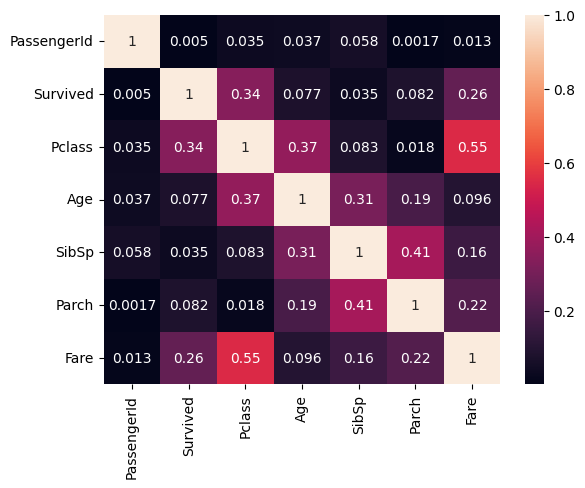

In [ ]:
#Correlação

import seaborn as sns
import numpy as np # Calcular correlação entre atributos

# Trabalhar apenas com colunas numéricas originais (para corr. de Pearson)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_cols].copy()

corr = df_numeric.corr().abs() # Visualizar (heatmap)
sns.heatmap(corr, annot=True) # Encontrar pares redundantes
upper = corr.where(np.triu( np.ones(corr.shape), k=1 ).astype(bool)) # Remover um de cada par
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
df_limpo = df_numeric.drop(columns=to_drop)

print("\nColunas numéricas consideradas para correlação:", numeric_cols)
print("\n--- Pares com correlação absoluta > 0.9 ---")
if to_drop:
    print("Colunas que seriam removidas por correlação (>0.9):", to_drop)
else:
    print("Nenhum par com correlação > 0.9 encontrado.")
print("\nColunas numéricas finais após remoção por correlação:", list(df_limpo.columns))